<a href="https://colab.research.google.com/github/AdindaRahajengSilviaPranesti/MarchineLearning_2141720158_AdindaRSP_02/blob/main/%5BGROUP2_MIDTERM%5DImage_Segmentation_Clustering_StudyCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 2
- Adinda Rahajeng Silvia Pranesti/02/2141720158
- Faizal Leviansyah/05/21u41720246
- Khafilla Akbar Syahputra/11/2141720152
- Muhammad Adhika Isa Nugraha/13/2141720267
- Muhammad Fahmi Huwaidi/16/2141720153


# Case Study - Image Segmentation Using Clustering

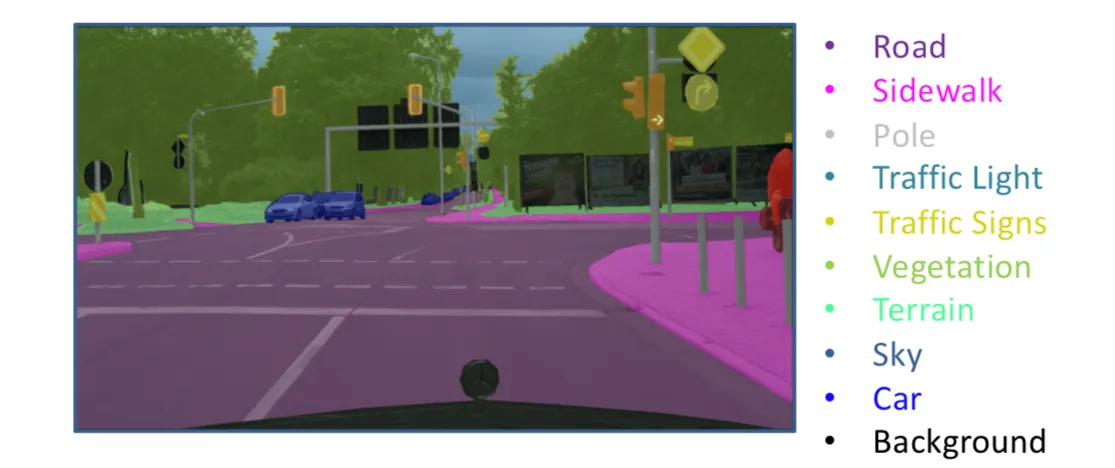

Segmentation is one of the methods used to distinguish one object from another in an image. This can be done by grouping the pixel values in the image based on their color proximity.

In this midterm exam, you are asked to perform segmentation of vehicle license plates in Indonesia. The purpose of segmentation in this case is to facilitate the reading of the license plate before further processes, such as character recognition on the license plate.

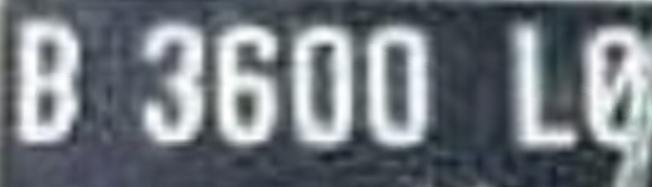

# Midterm Exam's Rules

Based on the given case presentation, you are required to:

1. Select 5 license plate images for each group member from the provided dataset. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Perform segmentation on the license plate images to enhance the characters on the license plates.
3. You can use the K-Means algorithm as explained in previous practical sessions or any other clustering algorithm.
4. You are allowed to perform data preprocessing on the images, such as:
    - Changing the color space
    - Dimension reduction
    - Etc.
5. Display a comparison of the images before and after segmentation.

**Open Challenge** (Optional)
- How can you evaluate the results of the segmentation?
- Apply it to this case!

**Note:**
1. The image loading process is exemplified using the OpenCV library.
2. By default, OpenCV will load images in the BGR format.

# Code Example

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow in google colab only

##**NUMBER 1**

In [3]:

# Load The Image
img = cv2.imread('/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_8 (UTS)/Dummy/dummy/34-E-2987-QC-10-18_jpeg.rf.206a77280b1253bcb19a884ee90c977e.jpg')

# Show image
# cv2.imshow(img)
cv2_imshow(img) # only for google colab (due to issue in cv2.imshow)

AttributeError: ignored

In [ ]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

161
415
3


In [ ]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(66815, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

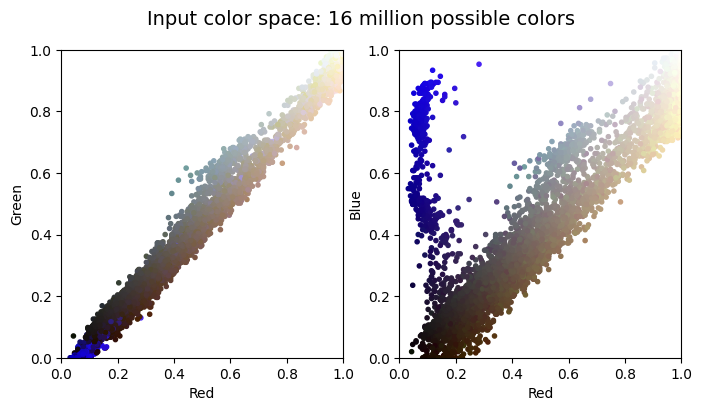

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

# Desired Result

Text(0.5, 1.0, '2-color Image')

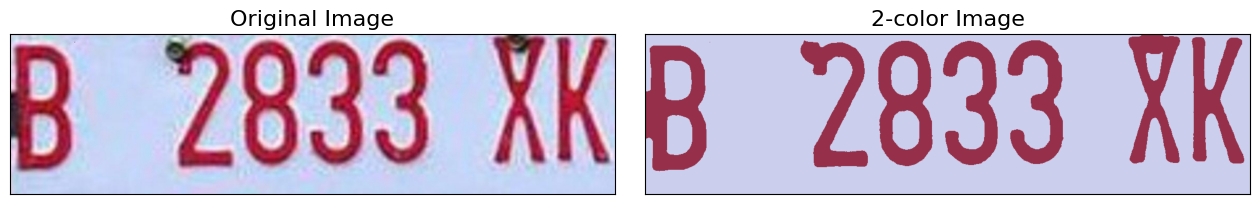

In [ ]:
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)

In [ ]:
pip install opencv-python


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

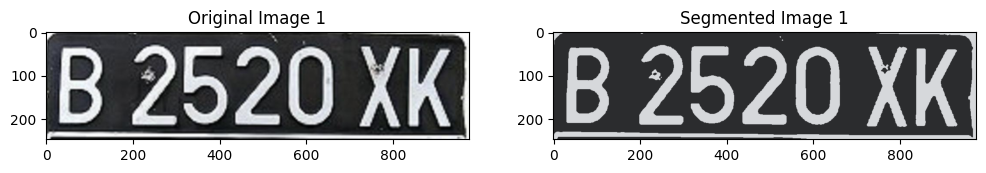

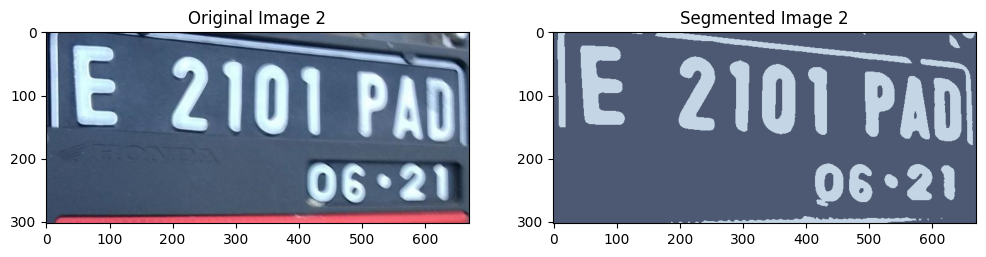

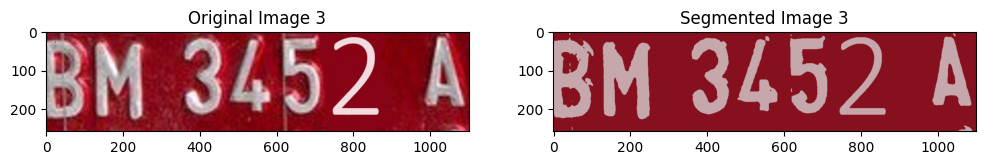

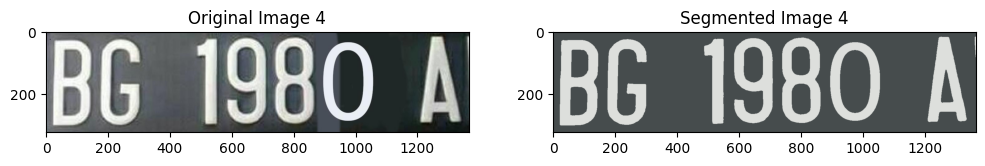

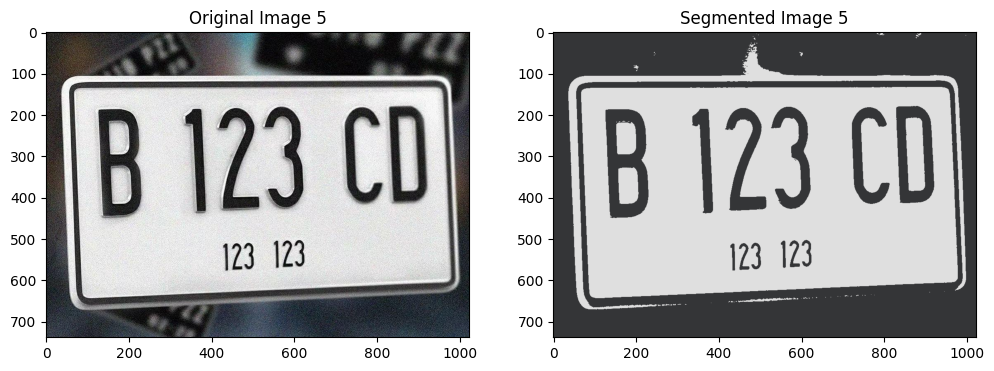

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load and preprocess each license plate image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    return image, blurred

# Performing K-Means clustering for image segmentation
def kmeans_segmentation(image, k=2):
    height, width, channels = image.shape
    pixels = image.reshape(-1, channels)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    segmented_pixels = kmeans.cluster_centers_[kmeans.labels_].reshape((height, width, channels)).astype(np.uint8)
    return segmented_pixels

# Display images before and after segmentation
def display_images(original_image, segmented_image, title1, title2):
    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title(title1)
    plt.subplot(122), plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)), plt.title(title2)
    plt.show()

# Load and preprocess the license plate images
image_paths = [
    '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_8 (UTS)/Dummy/dummy/B2520XK_PNG.rf.4e22939a8917f509074397176d67c5e5.jpg',
    '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_8 (UTS)/Dummy/dummy/25-E-2101-PAD-06-21_jpeg.rf.fb688472f5ba9c0c445f9d9330f39508.jpg',
    '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_8 (UTS)/Dummy/dummy/BM3452A_PNG.rf.0f77ba0375f050d4cdd9b8a36c7ab92b.jpg',
    '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_8 (UTS)/Dummy/dummy/BG1980A_png.rf.0144d9ab803a1ef7c66fad4c8178699f.jpg',
    '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_8 (UTS)/Dummy/dummy/019_jpg.rf.e73938ec62074bbde822f7d5a084bdef.jpg'
]

images = [preprocess_image(path) for path in image_paths]

k = 2  # Number of clusters for K-Means
segmented_images = [kmeans_segmentation(image, k) for _, image in images]

# Display images before and after segmentation
for i in range(len(image_paths)):
    display_images(images[i][0], segmented_images[i], f'Original Image {i+1}', f'Segmented Image {i+1}')
